## Finite Difference Scheme for Diffusion

Consider the diffusion equation $$\dfrac{\partial u}{\partial t}=\epsilon^2 \dfrac{\partial^2 u}{\partial x^2}$$

Here use the forward-time and central-space finite difference scheme.

$$\dfrac{\partial u}{\partial t}(x_i,t_k) \approx \dfrac{u^{k+1}_i-u^k_i}{\Delta t}$$


$$\dfrac{\partial^2 u}{\partial x^2}(x_i,t_k) \approx \dfrac{u^k_{i-1}-2u^k_i+u^k_{i+1}}{(\Delta x)^2}$$

hence, the full scheme is $$\dfrac{u^{k+1}_i-u^k_i}{\Delta t}= \epsilon^2 \left(\dfrac{u^k_{i-1}-2u^k_i+u^k_{i+1}}{(\Delta x)^2}\right)$$

$$u^{k+1}_i = u^k_i + \epsilon^2 \dfrac{\Delta t}{(\Delta x)^2} (u^k_{i-1}-2u^k_i+u^k_{i+1})$$

In the vector form $U^k=[u^k_0,u^k_1,\dots,u^k_{n-1},u^k_{n}]^T$

## Periodic Boundary Condition
\begin{equation}\displaystyle
    \begin{cases}
        u_t - u_{xx} = 0, &\text{for } x\in [0,L], t\geq 0, \\
        u(0+x,t)=u(L+x,t), &\text{for } t > 0, \\
        u(x,0)=f(x), &\text{for } x\in[0,L].
    \end{cases}
\end{equation}


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.sparse import diags
from scipy.sparse.linalg import eigs, spsolve

def set_Laplacian1D(nx, mesh_size):
    # central differece
    diagonals = [np.ones(nx), -2*np.ones(nx), np.ones(nx)]
    offsets = [-1, 0, 1]
    L = diags(diagonals, offsets, shape=(nx, nx), format='csr')
    L[0,-1] = L[-1,0] = 1
    return L / mesh_size**2


def neumann(nx, h):
    o = np.ones(nx)
    o0 = 2*np.ones(nx)
    o0[0]=o0[-1] = 1
    diagonals = [o, -o0, o]
    offsets = [-1, 0, 1]
    L = diags(diagonals, offsets, shape=(nx, nx), format='csr')
    return L / h**2

# Set up the parameters
nx = 2**7   # number of grid points in x-direction
L = 1     # length of the domain in each direction
dx = L / (nx - 1)   # grid spacing in x-direction
x = np.linspace(0, L, nx)   # x-coordinates of the grid points

dt = 1e-4      # time step
timesteps = 10**3   # number of time steps
eps = 1

Lap = neumann(nx-2, dx)
I = diags(np.ones(nx-2), shape=(nx-2, nx-2))

H = I - eps**2*dt* Lap

u = 5*np.cos(2*np.pi*x)
u[0]=u[1]
u[-1]=u[-2]
# u = 9*np.random.rand(nx)
u0 = u.copy()
m0 = np.sum(u)

u_historyArray = u
mass_list = [np.sum(u)]
inner_mass = [np.sum(u[1:-1])]

bdmass = [u[0]+u[-1]]
for i in range(timesteps):
#     plt.plot(u)
    b = u.copy()
    u[1:-1] = spsolve(H, b[1:-1])
    u[0] = u[1]
    u[-1] = u[-2]
    
#     u_historyArray = np.vstack([u_historyArray, u])
    mass_list.append(np.sum(u))
    inner_mass.append(np.sum(u[1:-1]))
    bdmass.append(u[0]+u[-1])
#     plt.plot(u)
#     break

In [26]:
print(inner_mass[0])
print(inner_mass[1])
print(inner_mass[2])

-5.00000000000002
-4.999999999999549
-4.9999999999991775


-0.04980801942210711


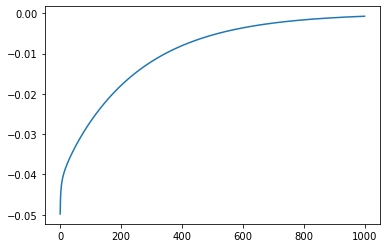

In [34]:
plt.plot(np.diff(mass_list))
print(bdmass[1]-bdmass[0])

4.716227408607665e-13


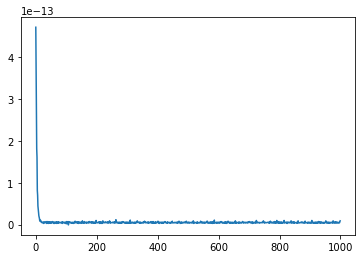

In [23]:
plt.plot(np.diff(inner_mass))
print(max(np.diff(inner_mass)))

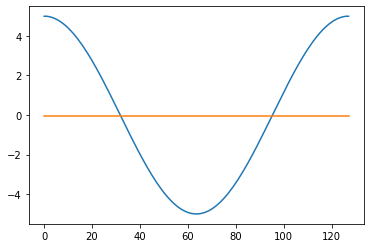

In [17]:
plt.plot(u0)
plt.plot(u)

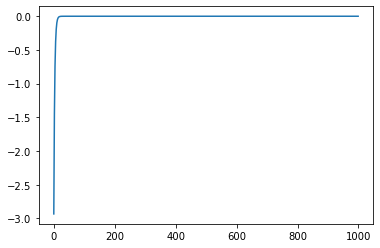

In [5]:
plt.plot(np.diff(mass_list))

In [61]:
invH = np.linalg.inv(H.toarray())
# invH = invH - I
eiginvH = np.linalg.eig(invH)[0]
max(abs(eiginvH))

0.9999999999999805

In [62]:
# invH.dot(u_historyArray[0])
np.linalg.norm(invH.dot(u_historyArray[0])-u_historyArray[0], np.inf)

0.7978683802060877

In [63]:
np.linalg.norm(invH, np.inf)

0.9999999999999893

In [64]:
np.linalg.norm(u_historyArray[0], np.inf)

0.9999810273487268

In [65]:
1/max(abs(np.linalg.eig(Lap.toarray())[0]))

3.844821016464664e-06

In [38]:
for i in range(timesteps):
    print(f"infinty norm {i+1} :", np.linalg.norm(u_historyArray[i+1] - u_historyArray[i], np.inf))

infinty norm 1 : 0.7978683802060935
infinty norm 2 : 0.1612623499691939
infinty norm 3 : 0.03259377882711617
infinty norm 4 : 0.006587739906022145
infinty norm 5 : 0.0013314908130042193
infinty norm 6 : 0.00026911623871093976
infinty norm 7 : 5.43928273710845e-05
infinty norm 8 : 1.0993686904930466e-05
infinty norm 9 : 2.222005319544945e-06
infinty norm 10 : 4.49103897789898e-07
infinty norm 11 : 9.07712997966112e-08
infinty norm 12 : 1.8346375765860928e-08
infinty norm 13 : 3.7081049240933715e-09
infinty norm 14 : 7.494691215074565e-10
infinty norm 15 : 1.514800620779347e-10
infinty norm 16 : 3.061661721430462e-11
infinty norm 17 : 6.188122956834965e-12
infinty norm 18 : 1.2507216411556016e-12
infinty norm 19 : 2.5279145785672206e-13
infinty norm 20 : 5.109332009821415e-14
infinty norm 21 : 1.0326802103171406e-14
infinty norm 22 : 2.087216909628792e-15
infinty norm 23 : 4.2186093858650083e-16
infinty norm 24 : 8.526504872789238e-17
infinty norm 25 : 1.7233471671863536e-17
infinty norm

In [7]:
np.sum(u_historyArray[-1])

-2.77322438522218e-13

In [4]:
# iteration

u_prev = u0
mid_periodic_mass_list = []
trapz_periodic_mass_list = []
history_u = [u0]
for i in range(0, timesteps):
    u = K_periodic * u_prev
    mid_periodic_mass_list.append(sum(u0-u)*dx)
    trapz_periodic_mass_list.append(np.trapz(u0-u, dx=dx))
    history_u.append(u)
    u_prev = u

C:\Users\user\AppData\Local\Temp\ipykernel_16744\2948193507.py:9: RuntimeWarning: invalid value encountered in double_scalars
  mid_periodic_mass_list.append(sum(u0-u)*dx)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4234: RuntimeWarning: invalid value encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4234: RuntimeWarning: overflow encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)


## Conservation with Periodic Boundary



<Figure size 432x288 with 0 Axes>

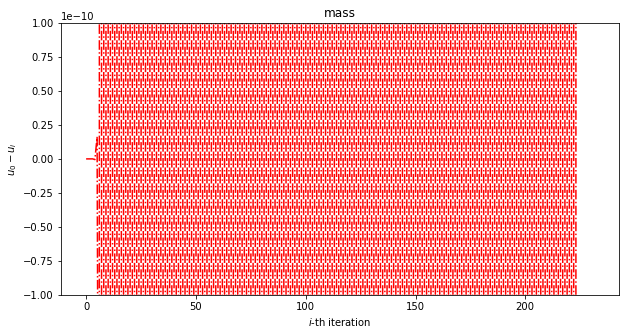

In [5]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.plot(mid_periodic_mass_list, 'r-.')
# plt.plot(trapz_periodic_mass_list, 'g-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
plt.ylim(-1e-10,1e-10)
plt.show()

## Dirichlet 
\begin{equation}\displaystyle
    \begin{cases}
        u_t - u_{xx} = 0, &\text{for } x\in [0,L], t\geq 0, \\
        u(0,t)=\alpha, u(L,t)=\beta, &\text{for } t> 0, \\
        u(x,0)=f(x), &\text{for } x\in(0,L).
    \end{cases}
\end{equation}

In [7]:
# set dirichlet condition
u0[0] = 0
u0[-1] = 0

# dirichlet
k = dt/(dx**2)
diagonals = [k*np.ones(nx), (1-2*k)*np.ones(nx), k*np.ones(nx)]
offsets = [-1, 0, 1]
K_dirichlet = diags(diagonals, offsets, shape=(nx, nx), format='csr')

K_dirichlet[0,0] = 1
K_dirichlet[-1,-1] = 1
K_dirichlet[0,1] = 0
K_dirichlet[-1,-2] = 0

In [43]:
eigs(K_dirichlet.toarray())

(array([0.99095492+0.j, 0.99345492+0.j, 0.99904508+0.j, 0.99654508+0.j,
        1.        +0.j, 1.        +0.j]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.67419986,
          0.        ],
        [-0.37174803, -0.60150096, -0.37174803, -0.60150096,  0.53935989,
          0.13483997],
        [ 0.60150096,  0.37174803, -0.60150096, -0.37174803,  0.40451992,
          0.26967994],
        [-0.60150096,  0.37174803, -0.60150096,  0.37174803,  0.26967994,
          0.40451992],
        [ 0.37174803, -0.60150096, -0.37174803,  0.60150096,  0.13483997,
          0.53935989],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.67419986]]))

In [8]:
u_prev = u0
dirichlet_mass_list = []
history_u = [u0]
for i in range(0, timesteps):
    u = K_dirichlet * u_prev
    dirichlet_mass_list.append(sum(u0-u) * dx)
    history_u.append(u)
    u_prev = u

In [9]:
# import matplotlib.animation as animation

# fig, ax = plt.subplots()
# ax.set_xlim(0,L)
# ax.set_ylim(-1.1, 1.1)
# line, = ax.plot(0,0)

# def animate(i):
#     line.set_xdata(x)
#     line.set_ydata(history_u[i])
#     return line,

# ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,timesteps,1000), blit=True)

# # plt.show()

# from IPython.display import HTML
# HTML(ani.to_jshtml())

<Figure size 432x288 with 0 Axes>

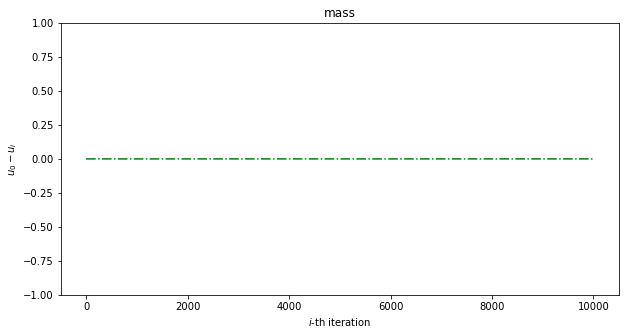

In [10]:
plt.figure(2)
plt.figure(figsize=(10,5))
# plt.plot(periodic_mass_list, 'r-')
plt.plot(dirichlet_mass_list, 'g-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
plt.ylim(-1,1)
plt.show()

In [38]:
from sympy import Matrix

m = Matrix(K_dirichlet.toarray().T)

P, J = m.jordan_form()

In [39]:
P

Matrix([
[1.0,   0,              -1.0,               1.0,               -1.0,                1.0],
[  0,   0,  3.61803398874989, -2.61803398874989,   1.38196601125011, -0.381966011250105],
[  0,   0, -5.85410196624968,  1.61803398874989,  0.854101966249685, -0.618033988749895],
[  0,   0,  5.85410196624968,  1.61803398874989, -0.854101966249685, -0.618033988749895],
[  0,   0, -3.61803398874989, -2.61803398874989,  -1.38196601125011, -0.381966011250105],
[  0, 1.0,               1.0,               1.0,                1.0,                1.0]])

In [40]:
J

Matrix([
[1.0,   0,                 0,                 0,                 0,                 0],
[  0, 1.0,                 0,                 0,                 0,                 0],
[  0,   0, 0.990954915028125,                 0,                 0,                 0],
[  0,   0,                 0, 0.993454915028125,                 0,                 0],
[  0,   0,                 0,                 0, 0.996545084971875,                 0],
[  0,   0,                 0,                 0,                 0, 0.999045084971875]])

## Neumann 
\begin{equation}\displaystyle
    \begin{cases}
        u_t - u_{xx} = 0, &\text{for } x\in [0,L], t\geq 0, \\
        u_x(0,t)=\alpha,u_x(L,t)=\beta, &\text{fot } t> 0, \\
        u(x,0)=u_0(x), &\text{for } x\in(0,L).
    \end{cases}
\end{equation}

### Scheme

Let partition the spatial domain $[0,L]$ nonuniformly $0=x_0<x_{\frac{1}{2}}<x_{1}<x_{2}<\dots<x_{n-1}<x_{n-\frac{1}{2}}<x_n=L$ , then we have the mesh grid $x_i=x_{0}+i\Delta x$ for $i=1,\dots,n-1$ and $x_{\frac{1}{2}}-x_0=x_{n}-x_{n-\frac{1}{2}}=\frac{1}{2}\Delta x$ , where $\Delta x = \dfrac{L}{n-1}$

The Neuman boundary $u_x(0,t)=\alpha$ and $u_x(L,t)=\beta$  can be approximated by forward and backward difference respectively.

$$u_{xx}\left(x_{\frac{1}{2}},t_k\right) \approx \dfrac{u_x(x_1,t_k)-u_x(0,t_k)}{\Delta x}, \, u_x(x_{n-\frac{1}{2}},t_k) \approx \dfrac{u_x(x_n,t_k)-u_x(x_{n-\frac{1}{2}},t_k)}{\Delta x}=\beta$$

$$u^k_{\frac{1}{2}} = u^k_0 + \dfrac{\Delta x}{2}\alpha, \, u^k_n = u^k_{n-\frac{1}{2}} + \dfrac{\Delta x}{2}\beta$$

Then the scheme numerical approximation at boundary is $$\dfrac{u^{k+1}_0-u^k_0}{\Delta t} \approx \dfrac{u^k_1-u^k_0}{\Delta x}$$ and $$\dfrac{u^{k+1}_n-u^k_n}{\Delta t} \approx \dfrac{u^k_n-u^k_{n-1}}{\Delta x}$$

Hence, we have the linear system $$u^{k+1}_i=u^k_i+\epsilon^2 \dfrac{\Delta t}{(\Delta x)^2} (u^k_{i-1}-2u^k_i+u^k_{i+1}), \text{ for } i=1,2,\dots,n-2,n-1,$$ and $$u^{k+1}_0 = u^k_0 + \epsilon^2 \dfrac{\Delta t}{\Delta x} (u^k_1-u^k_0), \, u^{k+1}_{n} = u^k_{n} + \epsilon^2 \dfrac{\Delta t}{\Delta x} (u^k_n-u^k_{n-1}).$$

In the martix form
$$ A=
\begin{bmatrix}
    1-k_1 & k_1 & 0 & \dots & \dots & \dots & \dots & 0 \\
    k_0 & 1-2k_0 & k_0 & 0 & \dots & \dots & \dots & 0 \\
    0 & k_0 & 1-2k_0 & k_0 & 0 & \dots & \dots & 0  \\
    0 & 0 & k_0 & 1-2k_0 & k_0 & 0 & \dots & 0 \\
    \vdots & & \ddots & \ddots & \ddots & \ddots & \ddots &\vdots\\
    0 & 0 & \dots & 0 & k_0 & 1-2k_0 & k_0 & 0 \\
    0 & 0 & \dots & 0 & 0 & k_0 & 1-2k_0 & k_0 \\
    0 & \dots & \dots & \dots & \dots & 0 & k_1 & 1-k_1
\end{bmatrix}
$$, where $k_0=\dfrac{\Delta t}{(\Delta x)^2}$ and $k_1=\dfrac{\Delta t}{\Delta x}$.

$$U^{k+1}=AU^k$$

In [11]:
# Diffusion eqaution with Neumann
k0 = dt/(dx**2)
# k1 = dt/dx
diagonals = [k0*np.ones(nx), (1-2*k0)*np.ones(nx), k0*np.ones(nx)]
offsets = [-1, 0, 1]
K_neumann = diags(diagonals, offsets, shape=(nx, nx), format='csr')
K_neumann[0,0] = K_neumann[-1,-1] = 1-2*k0
K_neumann[0,1] = K_neumann[-1,-2] = 2*k0
# K_neumann[-1,-1] = 1-k1
# K_neumann[-1,-2] = k1

u0 = np.sin(2*np.pi*x)

In [12]:
a.T * K_neumann

array([0.5, 1. , 1. , 1. , 1. , 0.5])

In [13]:
u_prev = u0
trapz_neumann_mass_list = mid_neumann_mass_list= []
history_u = [u0]
for i in range(0, timesteps):
    u = K_neumann * u_prev
    trapz_neumann_mass_list.append(np.trapz(u0-u, dx=dx))
    mid_neumann_mass_list.append(sum(u0-u) * dx)
    history_u.append(u)
    u_prev = u

In [14]:
# import matplotlib.animation as animation

# fig, ax = plt.subplots()
# ax.set_xlim(0,L)
# ax.set_ylim(-1e3, 1e3)
# line, = ax.plot(0,0)

# def animate(i):
#     line.set_xdata(x)
#     line.set_ydata(history_u[i])
#     return line,

# ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,timesteps,1000), blit=True)

# # plt.show()

# from IPython.display import HTML
# HTML(ani.to_jshtml())

## mass

$$\int^{L}_0 u(s,t) ds = \sum^{n-1}_{i=0} \int^{x_{i+1}}_{x_i} u(s,t) ds$$

midpoint method

$$\int^{x_{i+1}}_{x_i} u(s,t) \approx u\left(x_{i+\frac{1}{2}},t\right)\Delta x,$$
where $x_{i+\frac{1}{2}}=\dfrac{x_i+x_{i+1}}{2}$ is the midpoint of $x_i$ and $x_{i+1}.$

Hence, the numerical integration is $$\int^{L}_0 u(s,t) ds = \sum^{n-1}_{i=0} \int^{x_{i+1}}_{x_i} u(s,t) ds \approx \sum^{n-1}_{i=0} u\left(x_{i+\frac{1}{2}},t\right)\Delta x$$

One way to achieve this is by imposing a condition on the flux of the diffusing substance across the boundary, which ensures that the total mass of the substance is conserved over time. Specifically, we can specify Neumann boundary conditions of the form:

$\frac{\partial u}{\partial x}(0, t) = -D\frac{u(0, t) - u_0}{h}$

$\frac{\partial u}{\partial x}(L, t) = D\frac{u(L, t) - u_L}{h}$

where $D$ is the diffusion coefficient, $u_0$ and $u_L$ are the prescribed values of the concentration at the boundaries, and $h$ is the grid spacing. These boundary conditions ensure that the flux of the diffusing substance across the boundary is proportional to the difference between the prescribed concentration and the actual concentration at the boundary.

Note that these boundary conditions are only valid if $u_0$ and $u_L$ are chosen such that the total mass of the substance is conserved. Specifically, we need to choose $u_0$ and $u_L$ such that:

$\int_0^L u(x, 0)dx = \int_0^L u(x, t)dx = M$

where $M$ is the total mass of the substance. This can be achieved by choosing the initial concentration profile to be integrable over the domain, and by choosing $u_0$ and $u_L$ to satisfy the following condition:

$u_0 + u_L = \frac{2M}{L}$

With these boundary conditions and initial condition, the diffusion equation will conserve mass over time.

<Figure size 432x288 with 0 Axes>

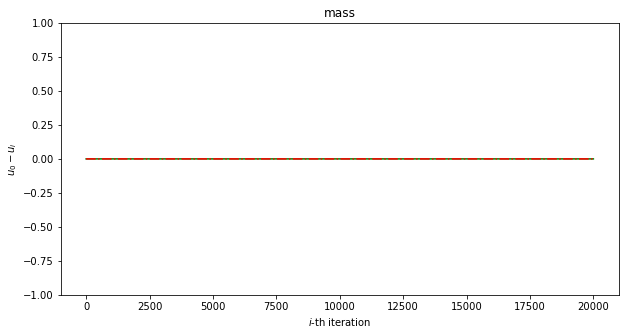

In [15]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.plot(trapz_neumann_mass_list, 'g-')
plt.plot(mid_neumann_mass_list, 'r-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
plt.ylim(-1,1)
plt.show()

In [16]:
plt.figure(3)
plt.figure(figsize=(10,5))
plt.plot(periodic_mass_list)
plt.plot(dirichlet_mass_list)
plt.plot(neumann_mass_list)
plt.legend(['periodic','dirichlet','neumann'])
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
# plt.ylim(-1e-13,1e-13)
plt.show()

NameError: name 'periodic_mass_list' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>